In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [17]:
# Load the dataset
df = pd.read_csv('/content/traffic.csv')
display(df.head())

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


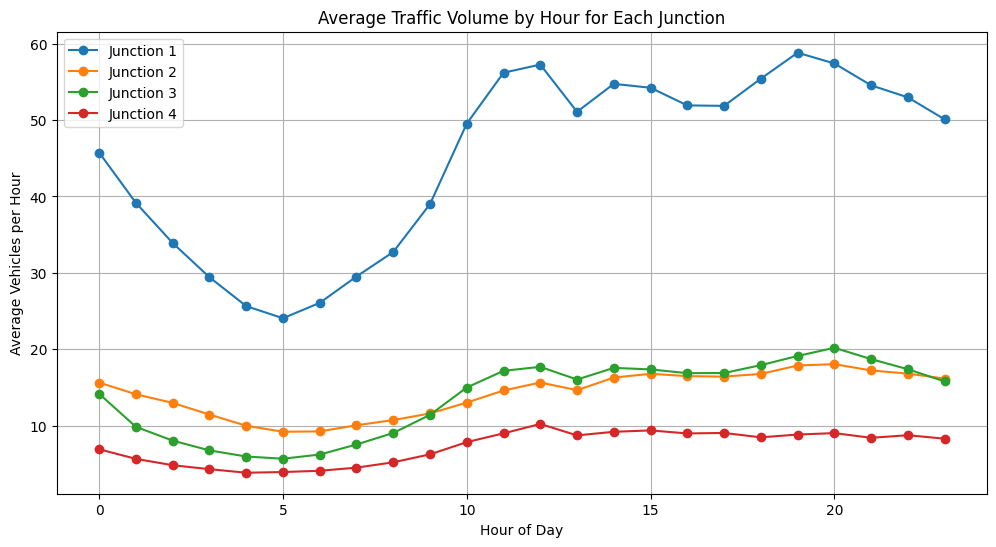

In [19]:
# Plot average traffic volume by hour for each junction
plt.figure(figsize=(12, 6))
for junction in df['Junction'].unique():
    junction_data = df[df['Junction'] == junction]
    hourly_avg = junction_data.groupby('hour')['Vehicles'].mean()
    plt.plot(hourly_avg.index, hourly_avg.values, marker='o', label=f'Junction {junction}')
plt.title('Average Traffic Volume by Hour for Each Junction')
plt.xlabel('Hour of Day')
plt.ylabel('Average Vehicles per Hour')
plt.legend()
plt.grid(True)
plt.show()

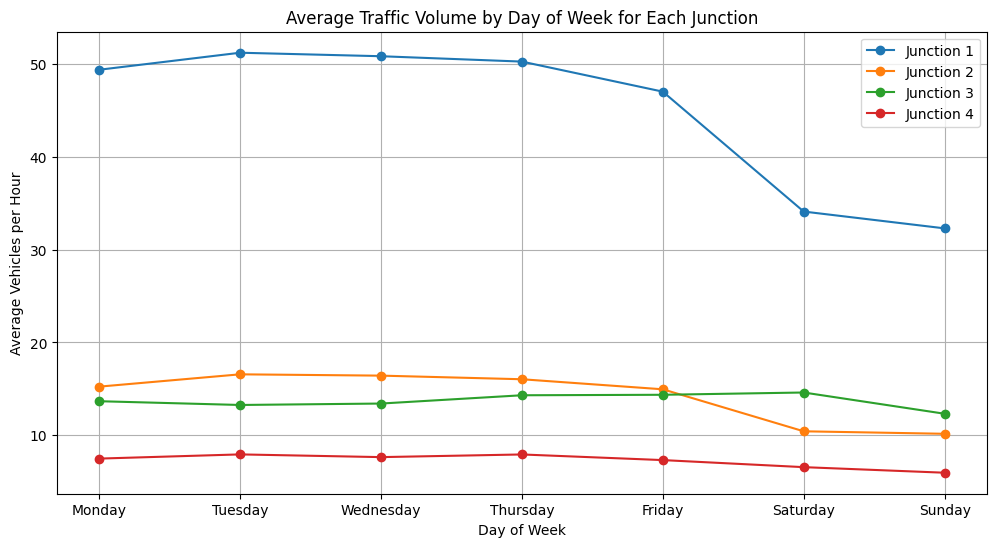

In [23]:
# Plot average traffic volume by day of the week for each junction
plt.figure(figsize=(12, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for junction in df['Junction'].unique():
    junction_data = df[df['Junction'] == junction]
    daily_avg = junction_data.groupby('day')['Vehicles'].mean().reindex(day_order)
    plt.plot(daily_avg.index, daily_avg.values, marker='o', label=f'Junction {junction}')
plt.title('Average Traffic Volume by Day of Week for Each Junction')
plt.xlabel('Day of Week')
plt.ylabel('Average Vehicles per Hour')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Generate traffic analysis report
print("\nTraffic Analysis Report")
print("======================")
for junction in df['Junction'].unique():
    junction_data = df[df['Junction'] == junction]
    hourly_avg = junction_data.groupby('hour')['Vehicles'].mean()
    daily_avg = junction_data.groupby('day')['Vehicles'].mean().reindex(day_order)

    # Identify peak hours
    peak_hours = hourly_avg.sort_values(ascending=False).head(3)
    print(f"\nJunction {junction} - Peak Hours:")
    for hour, volume in peak_hours.items():
        print(f"Hour {int(hour)}: {volume:.2f} vehicles/hour")

    # Identify busiest and least busy days
    print(f"\nJunction {junction} - Key Trends:")
    print(f"Highest traffic days: {', '.join(daily_avg.nlargest(3).index)}")
    print(f"Lowest traffic days: {', '.join(daily_avg.nsmallest(3).index)}")

print("\nRecommendations for City Planning:")
print("- Allocate traffic management resources during peak hours (e.g., 10 AM-12 PM, 3-5 PM) at Junctions 1, 2, and 3.")
print("- Investigate low traffic at Junction 4 for potential underutilization or data issues.")
print("- Optimize signal timings at Junction 1 during weekdays to handle higher volumes.")
print("- Suggest alternative routes on high-traffic days (e.g., Tuesday, Wednesday) for Junctions 1 and 2.")


Traffic Analysis Report

Junction 1 - Peak Hours:
Hour 19: 58.80 vehicles/hour
Hour 20: 57.40 vehicles/hour
Hour 12: 57.25 vehicles/hour

Junction 1 - Key Trends:
Highest traffic days: Tuesday, Wednesday, Thursday
Lowest traffic days: Sunday, Saturday, Friday

Junction 2 - Peak Hours:
Hour 20: 18.06 vehicles/hour
Hour 19: 17.88 vehicles/hour
Hour 21: 17.24 vehicles/hour

Junction 2 - Key Trends:
Highest traffic days: Tuesday, Wednesday, Thursday
Lowest traffic days: Sunday, Saturday, Friday

Junction 3 - Peak Hours:
Hour 20: 20.20 vehicles/hour
Hour 19: 19.13 vehicles/hour
Hour 21: 18.72 vehicles/hour

Junction 3 - Key Trends:
Highest traffic days: Saturday, Friday, Thursday
Lowest traffic days: Sunday, Tuesday, Wednesday

Junction 4 - Peak Hours:
Hour 12: 10.24 vehicles/hour
Hour 15: 9.39 vehicles/hour
Hour 14: 9.21 vehicles/hour

Junction 4 - Key Trends:
Highest traffic days: Tuesday, Thursday, Wednesday
Lowest traffic days: Sunday, Saturday, Friday

Recommendations for City Plannin